<a href="https://colab.research.google.com/github/emanuelfpaz/MLProjects/blob/master/OT/OTExample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The following example illustrates the computation of EMD and Sinkhorn transport plans and their visualization. **

It involves the implementation of an optimum transport network simplex solver for the linear program/ Earth Movers Distance.

https://people.csail.mit.edu/sparis/publi/2011/sigasia/Bonneel_11_Displacement_Interpolation.pdf


In [ ]:
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

Generate test data by creating source and destination gaussian distributions. Lastly we construct a loss matrix. 

In [ ]:
n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std
b = gauss(n, m=60, s=10)

# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()

Plot distributions and loss matrix.

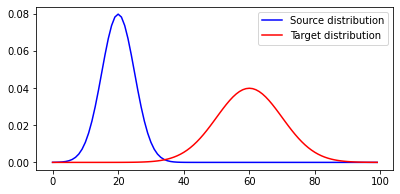

In [ ]:
pl.figure(1, figsize=(6.4, 3))
pl.plot(x, a, 'b', label='Source distribution')
pl.plot(x, b, 'r', label='Target distribution')
pl.legend()

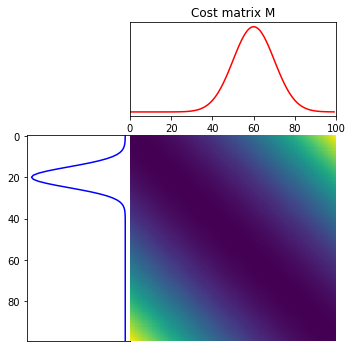

In [ ]:
pl.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, M, 'Cost matrix M')

Solve EMD.

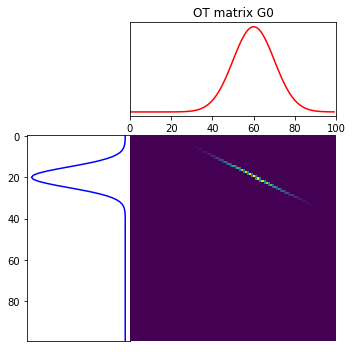

In [ ]:
G0 = ot.emd(a, b, M)

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, G0, 'OT matrix G0')

Solve Sinkhorn.


It.  |Err         
-------------------
    0|2.861463e-01|
   10|1.860154e-01|
   20|8.144529e-02|
   30|3.130143e-02|
   40|1.178815e-02|
   50|4.426078e-03|
   60|1.661047e-03|
   70|6.233110e-04|
   80|2.338932e-04|
   90|8.776627e-05|
  100|3.293340e-05|
  110|1.235791e-05|
  120|4.637176e-06|
  130|1.740051e-06|
  140|6.529356e-07|
  150|2.450071e-07|
  160|9.193632e-08|
  170|3.449812e-08|
  180|1.294505e-08|
  190|4.857493e-09|
It.  |Err         
-------------------
  200|1.822723e-09|
  210|6.839572e-10|


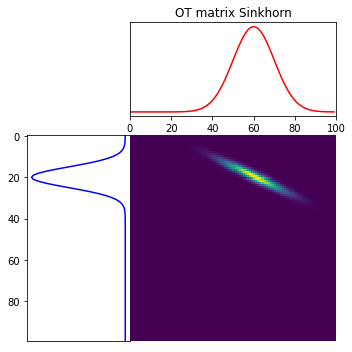

In [ ]:
lambd = 1e-3
Gs = ot.sinkhorn(a, b, M, lambd, verbose=True)

pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gs, 'OT matrix Sinkhorn')

pl.show()